In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [3]:
path = Config().data_path()/'rossmann'
path
train_df = pd.read_pickle(path/'train_clean')

PosixPath('/projects/da_workspace/szspace/.fastai/data/rossmann')

In [4]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
...,...,...,...,...,...
StateHoliday_bw,0,0,0,0,0
Promo_bw,5,5,5,5,5
SchoolHoliday_fw,7,1,5,1,1
StateHoliday_fw,0,0,0,0,0


In [5]:
n = len(train_df); n

844338

In [6]:
train_df.shape

(844338, 93)

### Experimenting with a sample

In [7]:
# np.random.permutation? and list sort function
a = np.random.permutation(range(10))[:5]
a
a.sort()
a

array([0, 8, 3, 4, 1])

array([0, 1, 3, 4, 8])

In [8]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [9]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
105,106,5,NaN,1390.0,61,10845
185,186,5,"Jan,Apr,Jul,Oct",290.0,50,4957
192,193,5,NaN,520.0,51,5904
267,268,5,NaN,4520.0,67,7492
403,405,5,"Jan,Apr,Jul,Oct",1080.0,61,5569


In [10]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
408546,68,1,"Mar,Jun,Sept,Dec",250.0,70,10590
409517,1039,1,"Mar,Jun,Sept,Dec",70.0,64,11194
411906,52,4,"Jan,Apr,Jul,Oct",450.0,80,6300
412746,892,4,NaN,19370.0,81,6691
412809,955,4,"Mar,Jun,Sept,Dec",1690.0,63,3938


In [11]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [27]:
# categorify?
# Categorify?

In [12]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
408546,68,1,"Mar,Jun,Sept,Dec",250.0,70,10590
409517,1039,1,"Mar,Jun,Sept,Dec",70.0,64,11194
411906,NaN,4,"Jan,Apr,Jul,Oct",450.0,80,6300
412746,NaN,4,NaN,19370.0,81,6691
412809,955,4,"Mar,Jun,Sept,Dec",1690.0,63,3938


In [13]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [14]:
small_train_df.PromoInterval.unique()
small_train_df['PromoInterval'].cat.codes.unique()
small_train_df['PromoInterval'].cat.codes.value_counts()

[NaN, Jan,Apr,Jul,Oct, Mar,Jun,Sept,Dec, Feb,May,Aug,Nov]
Categories (3, object): [Feb,May,Aug,Nov < Jan,Apr,Jul,Oct < Mar,Jun,Sept,Dec]

array([-1,  1,  2,  0])

-1    507
 1    273
 0    114
 2    106
dtype: int64

In [15]:
small_train_df['PromoInterval'].cat.codes[:5]

105   -1
185    1
192   -1
267   -1
403    1
dtype: int8

In [154]:
small_train_df['Store'].cat.codes

105        59
185       108
192       114
267       163
403       249
         ... 
402298    350
405248     66
405832    415
406037    526
406954    419
Length: 1000, dtype: int16

In [16]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [17]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
177599,291,3,NaN,2410.0,87,6334,True
205700,291,3,NaN,2410.0,81,14121,True
400103,622,5,NaN,2410.0,78,3546,True


### Preparing full data set

how the val data is created is very confusing here, grab the most recent sale's record as validation data set. reasonable.

In [18]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [19]:
test_df.shape
test_df.head(2)
train_df.head()
train_df.tail()

(41088, 92)

,index,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,...,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,0,1,1,4,2015-09-17,1.0,1,False,0,2015,...,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,1,2,3,4,2015-09-17,1.0,1,False,0,2015,...,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,0,1,5,2015-07-31,5263,555,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,7.0,0.0,5.0
1,1,2,5,2015-07-31,6064,625,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,2,3,5,2015-07-31,8314,821,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
3,3,4,5,2015-07-31,13995,1498,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,4,5,5,2015-07-31,4822,559,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
844333,1016776,682,2,2013-01-01,3375,566,1,0,True,1,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
844334,1016827,733,2,2013-01-01,10765,2377,1,0,True,1,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
844335,1016863,769,2,2013-01-01,5035,1248,1,0,True,1,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
844336,1017042,948,2,2013-01-01,4491,1039,1,0,True,1,...,0,0,0,-6,1.0,1.0,0.0,4.0,2.0,1.0
844337,1017190,1097,2,2013-01-01,5961,1405,1,0,True,1,...,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0


In [20]:
len(train_df),len(test_df)

(844338, 41088)

In [21]:
procs=[FillMissing, Categorify, Normalize]

In [22]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [23]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [24]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [25]:
# train_df['Date'] 
len(test_df)
train_df['Date'][len(test_df)]
train_df[train_df['Date'] == train_df['Date'][len(test_df)]].index.max()
range(41395)

41088

Timestamp('2015-06-19 00:00:00')

41395

range(0, 41395)

In [26]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [27]:
valid_idx = range(cut)

In [28]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [29]:
df.head(2)
df.shape

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,...,11,1.0,85,83,57,0,1,1,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,...,11,4.0,80,83,67,0,1,1,6064,2015-07-31


(844338, 40)

TabularList.from_df? why do we need path=path here? so the model and intermediate files will be saved in this path.

In [30]:
doc(TabularList.from_df)

In [31]:
path

PosixPath('/projects/da_workspace/szspace/.fastai/data/rossmann')

In [32]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [33]:
(cat_x, cont_x), y = next(iter(data.test_dl))
for o in cat_x, cont_x, y:
    print(to_np(o[:2]))

[[ 1  4  3  9 17  1 25  1  3  1  0 16  1  5 38 11  2  5  1  1  1  1  1  1]
 [ 3  4  3  9 17  1 25 26  1  1  2 14  4  7 38 11  2  5  1  1  1  1  1  1]]
[[-0.535809  0.253573  0.609246  1.175623  0.865325  1.575387  1.904889  0.709745  0.357897  0.255178  0.406578
   0.164506  2.110421  1.184784  1.111858 -0.479577]
 [ 1.112198  0.373838  0.609246  1.01791   0.865325  0.272106  0.377185  1.597486  2.370357  0.255178  0.315948
   0.164506  2.110421  1.184784  1.111858 -0.479577]]
[0 0]


In [34]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [74]:
# it also works without path=path, makes more sense since data created from df
# data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
#                 .split_by_idx(valid_idx)
#                 .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
#                 .add_test(TabularList.from_df(test_df, cat_names=cat_vars, cont_names=cont_vars))
#                 .databunch())

In [ ]:
doc(FloatList)

## Model

In [35]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [36]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [37]:
len(cat_vars), len(cont_vars), df['Store'].nunique(), df['DayOfWeek'].nunique()

(24, 16, 1115, 7)

In [38]:
df.columns
df['Store'].nunique()

Index(['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',
       'CompetitionMonthsOpen', 'Promo2Weeks', 'StoreType', 'Assortment',
       'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State',
       'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw',
       'StateHoliday_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw',
       'CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend',
       'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo',
       'SchoolHoliday', 'Sales', 'Date'],
      dtype='object')

1115

In [39]:
df['StateHoliday'].unique()

array([False,  True])

In [40]:
for c in cat_vars:
    print(c, df[c].nunique())

Store 1115
DayOfWeek 7
Year 3
Month 12
Day 31
StateHoliday 2
CompetitionMonthsOpen 25
Promo2Weeks 26
StoreType 4
Assortment 3
PromoInterval 3
CompetitionOpenSinceYear 23
Promo2SinceYear 8
State 12
Week 52
Events 21
Promo_fw 6
Promo_bw 6
StateHoliday_fw 3
StateHoliday_bw 3
SchoolHoliday_fw 8
SchoolHoliday_bw 8


KeyError: 'CompetitionDistance_na'

### i think i am still confused with what embedding really is. just like word2vec, embeddings for categorical variables are learned. the embedding representation can show richer information about the categorical levels, for example, saturday and sunday will be closer, while Tuesday and sunday will not be as close.

it will be helpful to hook into the layers to see how the embeddings are changing for each categorical variables during the training

In [41]:
learn.model
# embedding are for 24 categorical variables
learn.model.n_emb, learn.model.n_cont
# for example each of 1116 stores is embedded as a vector with 81 elements (embedding size),
# the 81 elements are stacked on top of other continuous variables as inputs.
# the emedddings are learned at the same time as other weights in the neural network.
# so total input features are 233=81 + 5 + .... + 16 (cont)

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

(217, 16)

In [42]:
len(data.train_ds.cont_names)

16

In [43]:
data.train_ds.cat_names

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_fw',
 'StateHoliday_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw',
 'CompetitionDistance_na',
 'CloudCover_na']

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


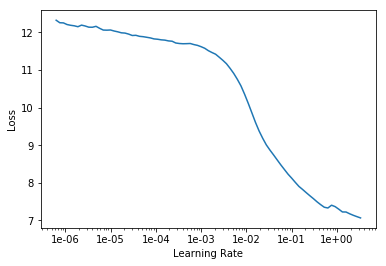

In [45]:
learn.recorder.plot()

how the forward works here? how the embedding matrix is learned?

In [46]:
# tabular_learner??
# TabularModel??
# parameters: weight and bias
params = list(learn.model.parameters())
params[0].shape
params[1].shape
params[24].shape
params[25].shape
params[26].shape

torch.Size([1116, 81])

torch.Size([8, 5])

torch.Size([16])

torch.Size([16])

torch.Size([1000, 233])

In [47]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.021561,0.017636,0.135024,02:59
1,0.019113,0.023952,0.124563,03:17
2,0.016815,0.014670,0.117093,03:00
3,0.013717,0.012336,0.114245,03:21
4,0.010967,0.010682,0.102040,03:11


In [95]:
learn.save('1')

In [97]:
learn.recorder.plot_losses?

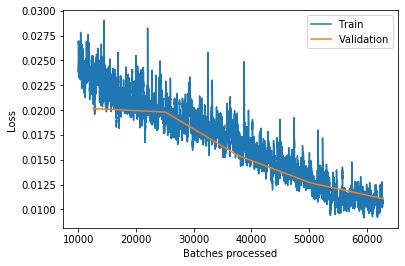

In [108]:
learn.recorder.plot_losses(skip_end=0, skip_start=10000)

In [109]:
learn.load('1');

In [110]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.013294,0.014356,0.125653,03:26
1,0.011582,0.015670,0.117766,03:23
2,0.011219,0.013569,0.115395,03:25
3,0.010294,0.012802,0.111181,03:33
4,0.008686,0.014059,0.111050,03:18


In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.011840,0.013236,0.110483
2,0.010765,0.057664,0.129586
3,0.010101,0.042744,0.111584
4,0.008820,0.116893,0.135458
5,0.009144,0.017969,0.126323


(10th place in the competition was 0.108)

you can call learn.get_preds to get predictions of dataset you specified, either train_ds, valid_ds, or test_ds

In [108]:
learn.summary()

TabularModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [81]                 90,396     True      
______________________________________________________________________
Embedding            [5]                  40         True      
______________________________________________________________________
Embedding            [3]                  12         True      
______________________________________________________________________
Embedding            [7]                  91         True      
______________________________________________________________________
Embedding            [11]                 352        True      
______________________________________________________________________
Embedding            [3]                  9          True      
______________________________________________________________________
Embedding            [10]                 260        True      
_________________________________________________

In [156]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_fw',
 'StateHoliday_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw',
 'CompetitionDistance_na',
 'CloudCover_na']

In [158]:
# get the embedding weights
store_embs = to_np(learn.model.embeds[0].weight.data)

# use t-SNE to visualize the data
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/notebook/test.csv'
np.savetxt(of, store_embs)

In [125]:
learn.data.train_ds.x

TabularList (802943 items)
Store 1115; DayOfWeek 5; Year 2015; Month 6; Day 19; StateHoliday False; CompetitionMonthsOpen 0; Promo2Weeks 25; StoreType d; Assortment c; PromoInterval Mar,Jun,Sept,Dec; CompetitionOpenSinceYear 1900; Promo2SinceYear 2012; State HE; Week 25; Events Rain; Promo_fw 1.0; Promo_bw 5.0; StateHoliday_fw 0.0; StateHoliday_bw 0.0; SchoolHoliday_fw 0.0; SchoolHoliday_bw 0.0; CompetitionDistance_na False; CloudCover_na False; CompetitionDistance -0.0130; Max_TemperatureC 0.1333; Mean_TemperatureC 0.4683; Min_TemperatureC 0.8602; Max_Humidity 0.0780; Mean_Humidity -0.3412; Min_Humidity -0.0811; Max_Wind_SpeedKm_h -0.1780; Mean_Wind_SpeedKm_h 0.1902; CloudCover 0.2552; trend 0.4066; trend_DE 0.5969; AfterStateHoliday -0.7329; BeforeStateHoliday 1.1848; Promo 1.1119; SchoolHoliday -0.4796; ,Store 1; DayOfWeek 4; Year 2015; Month 6; Day 18; StateHoliday False; CompetitionMonthsOpen 24; Promo2Weeks 0; StoreType c; Assortment a; PromoInterval #na#; CompetitionOpenSinceYea

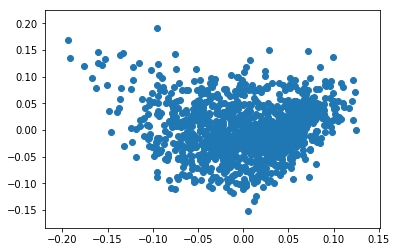

In [103]:
pca0, pca1, pca2 = params[0].pca(3).t()

plt.scatter(pca1, pca2)

In [105]:
pca1.shape

torch.Size([1116])

In [129]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)

In [131]:
doc(learn.get_preds)

In [140]:
learn.data.batch_size
len(learn.data.valid_ds)
len(learn.data.test_ds)
len(learn.data.train_ds)

64

41395

41088

802943

In [137]:
test_preds=learn.get_preds(DatasetType.Test, with_loss=True)

In [139]:
test_preds # output is tuple, third tensor is loss

[tensor([[ 8.3198],
         [ 8.7673],
         [ 9.0722],
         ...,
         [ 8.6521],
         [10.0509],
         [ 8.9099]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]),
 tensor([ 69.2183,  76.8664,  82.3043,  ...,  74.8591, 101.0198,  79.3859])]

In [141]:
test_preds[0].shape # preds = the size of test_ds

torch.Size([41088, 1])

In [61]:
import sample